Problem Objective :

## Perform a service request data analysis of New York City 311 calls.
You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

### Domain: Customer Service

## Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

1.Import a 311 NYC service request.

2.Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

3.Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

 ##### Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

4.Perform a statistical test for the following:

    Please note: 
    a.For the below statements you need to state the Null and Alternate
    b.then provide a statistical test to  accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

    1.Whether the average response time across complaint types is similar or not (overall)

    2.Are the type of complaint or service requested and location related?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Question 1.) Import a 311 NYC service request.

# Solution 1

# Read csv
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Vishal\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# To Read Top 5 records
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Check shape of DataFrame
df.shape

(300698, 53)

In [5]:
# See columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
# First we should check which column has how many missing values
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
# As we seen Closed Date is important column and have many missing values
df[df['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# We check data type of each column
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [9]:
# Question 2.) Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

# Solution 2

import datetime as dt
import time, datetime

# Convert "Closed Date" to datetime dtype
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Closed Date'].dtype

dtype('<M8[ns]')

In [10]:
# Convert "Created Date" to datetime dtype
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date'].dtype

dtype('<M8[ns]')

In [11]:
# Create new column Request_Closing_Time with time taken to close complain
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

df['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [12]:
# Question 3.: Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

# Solution 3
# From here starting Insight
# Insight - 1 - Categorize Request_Closing_Time as follows -
# Below 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, More than 6 hours - Very Slow
# For this, first will create new column Request_Closing_In_Hr and then create new column - Request_Closing_Time_Category

# Function to convert TimeDelta in Hour
def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    #print(days)
    #print(hours)
    return result
    #return round(pd.Timedelta(timeDel).seconds / 3600, 2)

In [13]:
# Testing of function with days
test_days = df[df['Unique Key'] == 32122264]['Request_Closing_Time']
print(toHr(test_days[27704]))
print(test_days[27704])
print(test_days.dtype)

145.08
6 days 01:05:00
timedelta64[ns]


In [14]:
# Apply this function to every row of column Request_Closing_Time
df['Request_Closing_In_Hr'] = df['Request_Closing_Time'].apply(toHr)

df['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [15]:
import math

In [16]:
# Function to categorize hours - Less than 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, More than 6 hours - Very Slow
def hrToCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

# Testing function
print(hrToCategory(1.99))

# Create new column Request_Closing_Time_Category and apply function on column Request_Closing_In_Hr

df['Request_Closing_Time_Category'] = df['Request_Closing_In_Hr'].apply(hrToCategory)

df['Request_Closing_Time_Category'].head()

Fast


0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

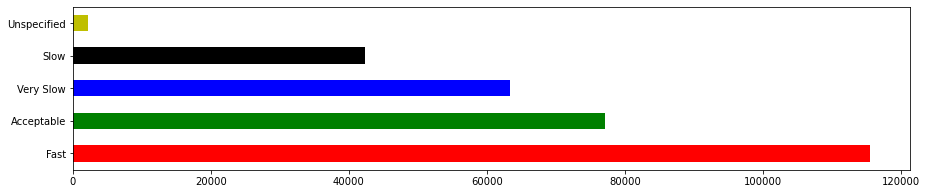

In [17]:
df['Request_Closing_Time_Category'].value_counts()

# Create Bar plot for Request_Closing_Time_Category to check frequency in Request_Closing_Time_Category and it prove Most count is in Fast category means closed less than 2 hours
df['Request_Closing_Time_Category'].value_counts().plot(kind="barh", color=list('rgbkymc'), figsize=(15,3))
plt.show()

In [18]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_In_Hr,Request_Closing_Time_Category
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable


In [19]:
# Insight 2 - To check with Month have Complain creation most and least

# We will create one column with Create_Month name

# Created Series for months in text format
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(monthSeries)
print(monthSeries[12])

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [20]:
df['Created Date'].dtype

# Function to fetch month from Created Date column

def getMonth(cDate):
    a = str(cDate)
    datee = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return monthSeries[datee.month]

# Test function getMonth
print(df['Created Date'][0])
print(getMonth(df['Created Date'][0]))

2015-12-31 23:59:45
Dec


In [21]:
# Created new column Created_Month and kept all text format months in that column

df['Created_Month'] = df['Created Date'].apply(getMonth)
df['Created_Month']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
300693    Mar
300694    Mar
300695    Mar
300696    Mar
300697    Mar
Name: Created_Month, Length: 300698, dtype: object

In [22]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_In_Hr,Request_Closing_Time_Category,Created_Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable,Dec


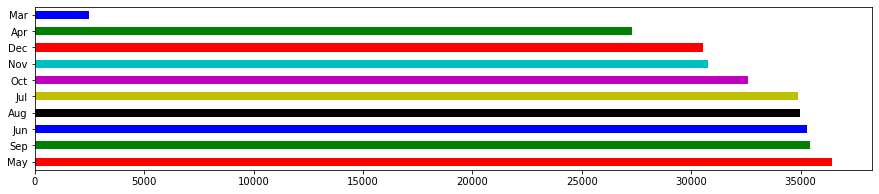

In [23]:
df['Created_Month'].value_counts()

# Create Bar plot for Complain Created Month to check frequency and it prove Most count is in May month and least is in March and in January there is no any complain
df['Created_Month'].value_counts().plot(kind="barh", color=list('rgbkymc'), figsize=(15,3))
plt.show()

In [24]:
# We are keeping one orig copy also with us
df_orig = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Vishal\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
# To confirm doubt of January doesn't have any value, we used original dataframe and check if any entry for Jan month
df_orig[df_orig['Created Date'].str.startswith('01/')]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [26]:
# Insight - 3
# Check count in each complain type - sorted decreasing order
df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

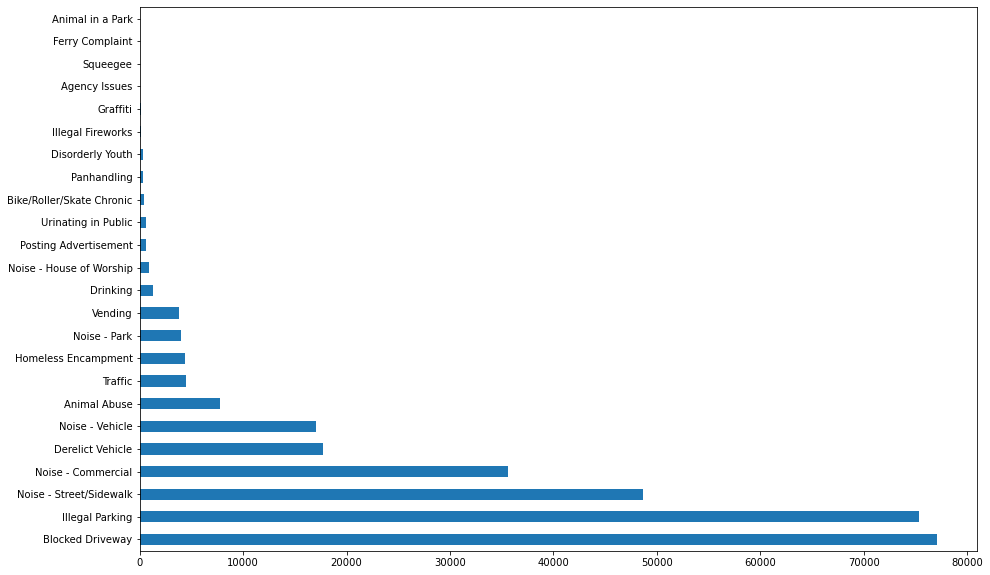

In [27]:
# Create Bar plot for complain type to check frequency in Complain Type
df['Complaint Type'].value_counts().plot(kind="barh", figsize=(15,10))
plt.show()

In [28]:
# Insight 4
# Let's check count for status type
df['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

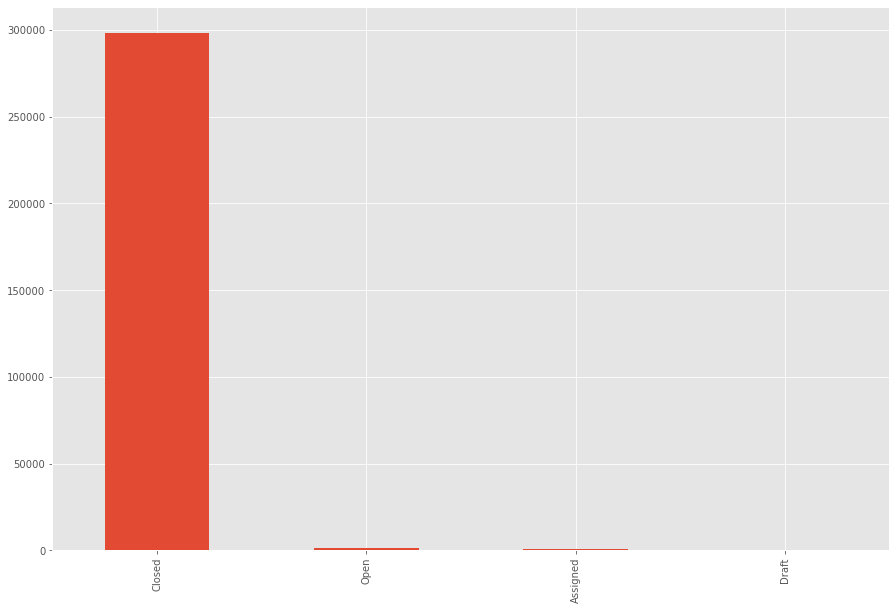

In [29]:
# Draw Bar lot for Status
from matplotlib import style
style.use('ggplot')
df['Status'].value_counts().plot(kind='bar',figsize=(15,10))
plt.show()

In [30]:
# Question 4.: Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

# Solution 4:

# For location we can choose here City, so first check if there is missing values there
df['City'].isnull().sum()

2614

In [31]:
# Fill all missing value with some default value here i used - Not Available
df['City'].fillna('Not Available', inplace=True)

In [32]:
df['City'].head()

0    NEW YORK
1     ASTORIA
2       BRONX
3       BRONX
4    ELMHURST
Name: City, dtype: object

In [33]:
df['City']

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693    Not Available
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

In [34]:
# Group them for City (location) first and Complain Type in that
df_grouped = df.groupby(['City', 'Complaint Type'])

In [35]:
# get average of this grouped dataframe, and get Request_Closing_Time column from there
df_mean = df_grouped.mean()['Request_Closing_In_Hr']
df_mean.isnull().sum()


4

In [36]:
# Group by City(location) first and then Complain Type and showing average of Request Closing in Hour
df_grouped = df.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
df_grouped

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [37]:
# Check if any value is NaN
df_grouped[df_grouped['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City          Complaint Type                                 
Not Available Ferry Complaint                             NaN
              Noise - House of Worship                    NaN
              Panhandling                                 NaN
              Posting Advertisement                       NaN

In [38]:
# Check total rows
print(df_grouped)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]


In [39]:
# drop null values from this group
df_grouped_withoutna = df_grouped.dropna()

In [40]:
# verify if new group has null values
df_grouped_withoutna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [41]:
# verify number of rows after dropping null values
print(df_grouped_withoutna)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]


In [42]:
# Sorting by column - Request_Closing_In_Hr for City on grouped
df_sorted = df_grouped_withoutna.sort_values(['City', 'Request_Closing_In_Hr'])
df_sorted

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[778 rows x 1 columns]

In [43]:
# Question 5: Perform a statistical test for the following:
# Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

# Whether the average response time across complaint types is similar or not (overall)
# Are the type of complaint or service requested and location related?

In [44]:
import scipy.stats as stats
from math import sqrt

In [45]:
##### Try ANOVA for first one

# H0 : All Complain Types average response time mean is similar
# H1 : Not similar

df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [46]:
top5_complaints_type = df['Complaint Type'].value_counts()[:5]
top5_complaints_type

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [47]:
top5_complaints_type_names = top5_complaints_type.index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [48]:
sample_data = df.loc[df['Complaint Type'].isin(top5_complaints_type_names), ['Complaint Type', 'Request_Closing_In_Hr']]
sample_data.head()

,Complaint Type,Request_Closing_In_Hr
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [49]:
sample_data.shape

(254312, 2)

In [50]:
sample_data.isnull().sum()

Complaint Type              0
Request_Closing_In_Hr    2059
dtype: int64

In [51]:
#sample_data[~sample_data.isin(['NaN', 'NaT']).any(axis=1)]
#sample_data[sample_data.isnull()]

sample_data.dropna(how='any', inplace=True)
sample_data.isnull().sum()
# sample_data_without_null[sample_data_without_null.isnull()]

Complaint Type           0
Request_Closing_In_Hr    0
dtype: int64

In [52]:
sample_data.shape

(252253, 2)

In [53]:
s1 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[0]].Request_Closing_In_Hr
s1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_In_Hr, dtype: float64

In [54]:
s2 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[1]].Request_Closing_In_Hr
s2.head()

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_In_Hr, dtype: float64

In [55]:
s3 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[2]].Request_Closing_In_Hr
s3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_In_Hr, dtype: float64

In [56]:
s4 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[3]].Request_Closing_In_Hr
s4.head()

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Request_Closing_In_Hr, dtype: float64

In [57]:
s5 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[4]].Request_Closing_In_Hr
s5.head()

14     10.49
151     3.95
255     1.36
256     4.13
295     0.75
Name: Request_Closing_In_Hr, dtype: float64

In [58]:
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())
print(s4.isnull().sum())
print(s5.isnull().sum())

0
0
0
0
0


In [59]:
F_onewayResult=stats.f_oneway(s1, s2, s3, s4, s5)
F_onewayResult

F_onewayResult(statistic=1799.598683238952, pvalue=0.0)

## We can see pvalue is less than 0.05 so we reject null hypothesis and average response time is not same.

In [60]:
### Try ChiSquare Test for second one - # Are the type of complaint or service requested and location related?

# H0 : 2 categories - Complain Type and Location is independent means not related
# Ha : 2 categories - Complain Type and Location is dependent means related

In [61]:
top5_location = df['City'].value_counts()[:5]
top5_location

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [62]:
top5_location_names = top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [63]:
sample_data_location_c_type = df.loc[(df['Complaint Type'].isin(top5_complaints_type_names)) & (df['City'].isin(top5_location_names)), ['Complaint Type', 'City']]
sample_data_location_c_type.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [64]:
pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City'], margins=True)

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12755,28148,2818,2072,2142,47935
Derelict Vehicle,1953,5181,954,537,1766,10391
Illegal Parking,7859,27462,1421,12128,4886,53756
Noise - Commercial,2434,11463,429,14550,678,29554
Noise - Street/Sidewalk,8892,13356,339,20433,819,43839
All,33893,85610,5961,49720,10291,185475


In [65]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City']))

In [66]:
print(ch2)
print(p_value)

40522.79928349593
0.0


# We can see pvalue is less than 0.05 so we reject null hypothesis means complain type and location is not independent.